In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')
     

In [ ]:
df=pd.read_excel(r'cust_data.xlsx',index_col=0)
print(df)

        Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
Cust_ID                                                         
1            M       7       0         0        0     0     0   
2            F       0       0         1        0     0     0   
3            M       7       0         1        0     0     0   
4            F       0       0         0        0     0     0   
5          NaN      10       0         0        0     0     0   
...        ...     ...     ...       ...      ...   ...   ...   
29996        M       0       0         0        0     0     0   
29997        M       1       0         1        0     0     0   
29998        M       0       0         1        0     0     0   
29999        M       0       0         0        0     0     0   
30000        F       3       2         0        0     1     0   

         Mondelez International  Wrangler  Vans  ...  LG  Dior  Scabal  \
Cust_ID                                          ...                     
1     

In [ ]:
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [ ]:
df.shape

(30000, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [ ]:
df.isnull().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

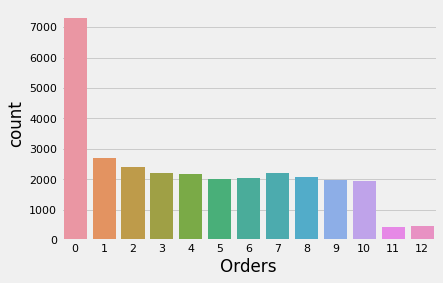

In [ ]:
sns.countplot(data=df,x='Orders')

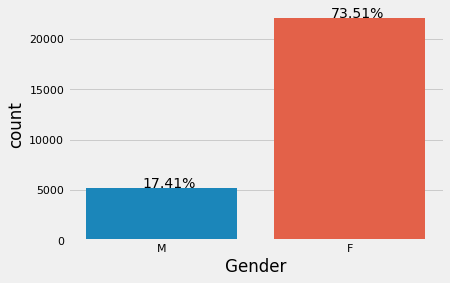

In [ ]:
sns.countplot(data=df,x='Gender')

plt.text(x = -0.1, y = df.Gender.value_counts()[1] + 40, s = str(round((df.Gender.value_counts()[1])*100/len(df.Gender),2)) + '%')
plt.text(x = 0.9, y = df.Gender.value_counts()[0] + 40, s = str(round((df.Gender.value_counts()[0])*100/len(df.Gender),2)) + '%')
plt.show()

Text(0.5, 1.0, 'Heatmap of missing values')

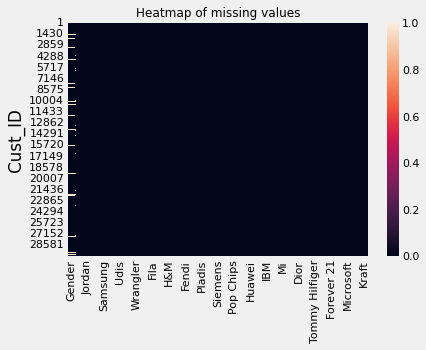

         Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
Cust_ID                                                  
1             7       0         0        0     0     0   
2             0       0         1        0     0     0   
3             7       0         1        0     0     0   
4             0       0         0        0     0     0   
5            10       0         0        0     0     0   
...         ...     ...       ...      ...   ...   ...   
29996         0       0         0        0     0     0   
29997         1       0         1        0     0     0   
29998         0       0         1        0     0     0   
29999         0       0         0        0     0     0   
30000         3       2         0        0     1     0   

         Mondelez International  Wrangler  Vans  Fila  ...  Scabal  \
Cust_ID                                                ...           
1                             0         0     2     0  ...       0   
2                             0    